# DEEP PROJECT NOTEBOOK


Project Description, issues, pictures, present CLIP, TPT, COOP and CoCa briefly.

## Test-Time Prompt Tuning (TPT)

Test-Time Prompt Tuning (TPT) is a method proposed to enhance zero-shot generalization capabilities of pre-trained vision-language models, such as CLIP, on new, unseen tasks by dynamically adjusting the text prompts during the test phase. This approach leverages the model's inherent knowledge and adapts it to specific tasks without the need for extra training data or annotations.

### 1. Zero-Shot Generalization:

TPT allows models like CLIP to perform well on new tasks by tuning prompts in real-time based on the input image. It operates in a purely zero-shot manner, thereby enhancing the model's ability to generalize to new domains without additional training or annotations. 
At the inference stage, the only information available is the single test sample $ X_{test} $ without label information. TPT, therefore, manages to optimize the prompt  $ p $ at test time based on the single test sample. In general, our objective can be formulated in the form of 

$  \mathbf{p^∗} = arg min _\mathbf{p} L(F; \mathbf{p}; X_{test}) $

for some carefully constructed loss, where $ \mathbf{p^∗} $ is the optimal prompt distribution. 

### 2. Adaptive Prompt Optimization:

During the test phase, TPT optimizes the text prompt by minimizing the entropy across the outputs of multiple augmented views of a single test image. This ensures consistent predictions across different views, making the model more robust.


### 3. Confidence Selection:

TPT incorporates a confidence selection mechanism to filter out noisy augmentations that could lead to inaccurate predictions. Only high-confidence (i.e. with entropy under a certain threshold $ τ $) views are used for prompt optimization, improving the overall reliability of the model's predictions. 

### Applications

### 1. Image Classification:

For image classification tasks, TPT generates multiple augmented views of a test image and tunes the prompt to achieve consistent predictions. This improves the zero-shot accuracy of models like CLIP without requiring additional labeled data.
Because labels are not available for test time tuning, the loss for prompt tuning must be unsupervised. The goal is to promote the consistency
of the model’s predictions across different augmented views of a given test image. We
generate N randomly augmented views of the test image using a family of random augmentations $ A $,
and minimize the entropy of the averaged prediction probability distribution:


$ \mathbf{p^∗} = arg min_{\mathbf{p}} − {\sum \limits _{i=1} ^{K}}\tilde{p}_{\mathbf{p}} (y_i|jX_{test}) log \tilde{p}_{\mathbf{p}}(y_i|X_{test}) $

where $ \tilde{p}_{\mathbf{p}}(y_i|X_test) = \frac{1}{N} {\sum \limits _{i=1} ^{N}}p_{\mathbf{p}} (y_i|A_{i}(X_{test})) $

Here,  $ p_{\mathbf{p}}(y_i|A_i(X_{test})) $ is the vector of class probabilities produced by the model when provided with
prompt $ \mathbf{p} $ and the i-th augmented view of the test image.

### Benefits

### 1. Enhanced Generalization:

By tuning prompts dynamically, TPT helps models maintain high performance even when faced with distribution shifts or unseen categories.

### 2.Improved Performance:

Experimental results have shown that TPT can significantly boost the performance of vision-language models on various benchmarks, achieving state-of-the-art results in many cases.

For more detailed information, you can refer to the original research paper on TPT: [Test-Time Prompt Tuning for Zero-Shot Generalization in Vision-Language Models](https://arxiv.org/pdf/2209.07511).

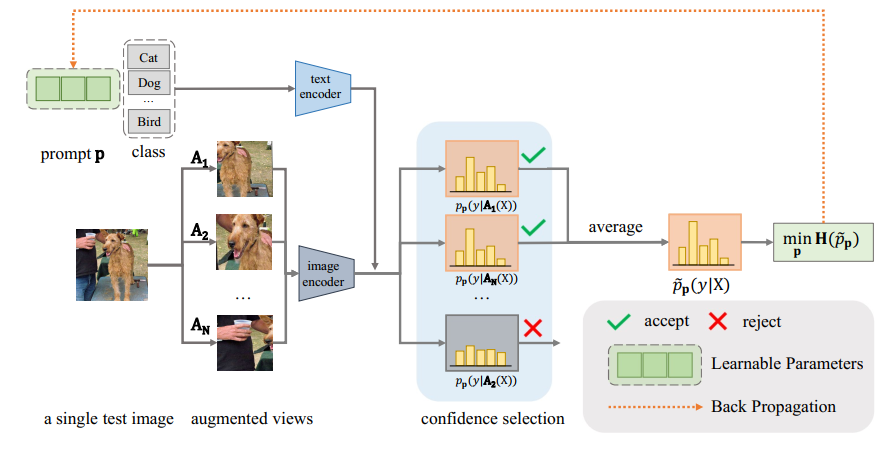

Figure 1: Test-time Prompt Tuning (TPT) for image classification. We tune adaptive prompts on
the fly with a single test sample, without the need for additional training data or annotations. TPT
optimizes the prompt to encourage consistent predictions across augmented views by minimizing the
marginal entropy. We introduce confidence selection to filter out noisy augmentations.

## Project Setup

To run this notebook, you need to install the required dependencies. You can do this by running the following commands in your terminal:

### Step 1
Clone repo and its submodules
###  Step 2
Download project libraries
###  Step 3
Import libraries
###  Step 4
Download resources:
- ImageNetA
- ImageNetV2
- CoOp pretrained weights

In [12]:
!git clone --recursive https://github.com/rogergheser/DS-DLProject.git
%cd DS-DLProject/
!ls


augmix.py	coca.py        loaders.py	 results	     tmp
augmix_test.py	COOP	       notebook.ipynb	 runs		     TPT
CLIP		coop_train.py  py_vars.py	 stats.py	     tpt_eval.py
coca_model.py	ice	       requirements.txt  test_histograms.py  utils.py


In [13]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux

In [2]:
%cd DS-DLProject

/content/DS-DLProject


In [3]:
import io
import torch
import os
import numpy as np
import requests
import tarfile
import gdown
import torch.amp
from torch.utils.tensorboard import SummaryWriter
import zipfile
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
try:
    from torchvision.transforms import InterpolationMode
    BICUBIC = InterpolationMode.BICUBIC
except ImportError:
    BICUBIC = Image.BICUBIC

from CLIP import clip

from COOP.models import OurCLIP
from COOP.utils import get_optimizer, get_loss_function, log_values
from COOP.functions import training_step, test_step
from COOP.dataloader import get_data
from loaders import Augmixer
from utils import entropy, batch_report, make_histogram
from copy import deepcopy

DEBUG = True

Here we download the imagenet-a dataset

In [4]:
# Define the URL for the ImageNet-A dataset
url_a = "https://people.eecs.berkeley.edu/~hendrycks/imagenet-a.tar"
url_v2 = "https://huggingface.co/datasets/vaishaal/ImageNetV2/resolve/main/imagenetv2-matched-frequency.tar.gz"

# Define the local filename to save the dataset
local_filename_a = "imagenet-a.tar"
local_filename_v2 = "imagenetv2-matched-frequency-format-val.tar"

# download a file from a URL
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

def extract_tar_file(file_name, output_dir='.'):
    with tarfile.open(file_name, 'r') as tar:
        tar.extractall(path=output_dir)

# Download the imagenet-a dataset
download_file(url_a, local_filename_a)

extract_tar_file(local_filename_a, './data')

# Download the imagenet-v2 dataset
download_file(url_v2, local_filename_v2)

extract_tar_file(local_filename_v2, './data')

# Clean up the tar files
os.remove(local_filename_a)
os.remove(local_filename_v2)

print("Download and extraction complete.")

Download and extraction complete.


We download the four backbones of COOP

In [5]:
# Create a directory
output_dir = './bin/coop'
os.makedirs(output_dir, exist_ok=True)

# Download the models from the link given in the original github repository
url = 'https://drive.google.com/uc?id=18ypxfd82RR0pizc5MM1ZWDYDk4j0BtPF'
output_file = os.path.join(output_dir, 'backbones_COOP.zip')
gdown.download(url, output_file, quiet=False)

# Path to the downloaded zip file
zip_file = os.path.join(output_dir, 'backbones_COOP.zip')

# Extract the contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

os.remove(zip_file)


Downloading...
From (original): https://drive.google.com/uc?id=18ypxfd82RR0pizc5MM1ZWDYDk4j0BtPF
From (redirected): https://drive.google.com/uc?id=18ypxfd82RR0pizc5MM1ZWDYDk4j0BtPF&confirm=t&uuid=56dae334-0b34-410e-9406-3d24acd4e34e
To: /content/DS-DLProject/bin/coop/backbones_COOP.zip
100%|██████████| 137M/137M [00:04<00:00, 30.2MB/s]


In [10]:
%mv bin/coop/to_gdrive/* bin/coop/
%rmdir bin/coop/to_gdrive/
%ls bin/coop

rn101_ep50_16shots/  rn50_ep50_16shots/  vit_b16_ep50_16shots/  vit_b32_ep50_16shots/


# Implementation Details


The whole project is built on top of the <cite>tpt_eval.py</cite> file. The file is structured in order to make the main required imports and it implements the **Test Time Adaptation** step. There are two main functions:
1. tta_net_train 
2. tpt_train_loop

In order to guide the update step which perform gradient descent to update the prompt lerner parameters, we use _avg_entropy_ as loss function as shown in [Test-Time Prompt Tuning for Zero-Shot Generalization in Vision-Language Models](https://arxiv.org/pdf/2209.07511).

In [ ]:
def avg_entropy(outputs):
    logits = outputs - outputs.logsumexp(dim=-1, keepdim=True) # logits = outputs.log_softmax(dim=1) [N, 1000]
    avg_logits = logits.logsumexp(dim=0) - np.log(logits.shape[0]) # avg_logits = logits.mean(0) [1, 1000]
    min_real = torch.finfo(avg_logits.dtype).min
    avg_logits = torch.clamp(avg_logits, min=min_real)
    return -(avg_logits * torch.exp(avg_logits)).sum(dim=-1)

_tta_net_train_: is used to update the network weights according to the average entropy of the logits which comes from the network. 

In [ ]:
def tta_net_train(batch, net, optimizer, scaler, id2classes, device="cuda", captioner=None, debug=False):
    batch_idx, inputs, targets = batch

    inputs = inputs.to(device)
    targets = targets.to(device)

    # Forward pass
    outputs, text_features = net(inputs)
    outputs = outputs.softmax(dim=-1)

    filtered_inputs, filtered_outputs = filter_on_entropy(inputs, outputs, p_percentile=10, return_original=debug)
    if captioner is not None:
        batch = (batch_idx, filtered_inputs, filtered_outputs, targets)
        filtered_outputs = add_caption_loss(net, captioner, batch, text_features, id2classes, debug=debug, ensamble_method=ENSAMBLE_METHOD)

    avg_predictions = torch.mean(filtered_outputs, dim=0).unsqueeze(0)
    prediction_entropy = entropy(avg_predictions).item()

    optimizer.zero_grad()
    loss = avg_entropy(filtered_outputs)

    with torch.cuda.amp.autocast():
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

    prediction = avg_predictions.argmax(dim=1)
    return loss.item(), prediction, prediction_entropy


_tpt_train_loop_: is the main function which takes every element of the dataset, updates the network calling _tta_net_train_, evaluate the prediction with the new network and then it resets the network for the next sample.

In [ ]:
def tpt_train_loop(data_loader, net, optimizer, cost_function, scaler, writer, id2classes, device="cuda", captioner=None, debug=False, checkpoint=None):
    
    cumulative_loss = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    loss_diff = 0.0
    optimizer_state = deepcopy(optimizer.state_dict())

    pbar = tqdm(data_loader, desc="Testing", position=0, leave=True, initial=offset, total=len(data_loader)+offset)
    for batch_idx, (inputs, targets, _) in enumerate(data_loader):

        # Reset the prompt_learner to its initial state and the optimizer to its initial state
        with torch.no_grad():
            net.reset()
            optimizer.load_state_dict(optimizer_state)

        _loss, no_tpt_prediction, no_tpt_prediction_entropy = tta_net_train((batch_idx, inputs, targets), net, optimizer, scaler, id2classes, device=device, captioner=captioner, debug=debug)

        net.eval()
        with torch.no_grad():
            # Classification with the updated net
            inputs = inputs[0].unsqueeze(0).to(device)
            targets = targets.to(device)
            outputs, _ = net(inputs)
            loss = cost_function(outputs, targets)
            prediction = outputs.argmax(dim=1)
            prediction_entropy = entropy(prediction).item()

            cumulative_loss.update(loss.item())

        # Update accuracies
        _key = id2classes[targets.item()]

        values, predictions = outputs.topk(5)
        if targets.item() in predictions:
            top5.update(1)
        else:
            top5.update(0)
        
        if prediction == targets:
            top1.update(1)
        else:
            top1.update(0)

        loss_diff =  _loss - loss.item() # comparison of loss with and without TPT
        entropy_diff = prediction_entropy - no_tpt_prediction_entropy # comparison of entropy with and without TPT
        # Log Values
        writer.add_scalar("Delta_loss/test", loss_diff, batch_idx)
        writer.add_scalar("Delta_entropy/test", entropy_diff, batch_idx)
        writer.add_scalar("Top-1", top1.get_avg(), batch_idx)         
        
        pbar.set_postfix(test_loss=loss.item(), top1=top1.get_avg(), top5=top5.get_avg())
        pbar.update(1)

    # Draw histogram of class accuracies
    no_tpt_accuracies, accuracies = compute_accuracies(no_tpt_class_acc, tpt_class_acc)
    image = make_histogram(no_tpt_accuracies, accuracies, 'No TPT','TPT', save_path=f"runs/{RUN_NAME}/accuracy_by_class.png")
    image = make_histogram(no_tpt_accuracies, accuracies, 'No TPT','TPT', save_path=f"runs/{RUN_NAME}/accuracy_by_worst_class.png", worst_case=True)

    return cumulative_loss.get_avg() , top1.get_avg()

In the main we load and augment the data, we load CLIP and COOP. We use AdamW as optimizer

In [ ]:
def main(
    dataset_name="imagenet_a",
    backbone="RN50",
    device="mps",
    batch_size=16,
    learning_rate=0.005,
    tta_steps=2,
    run_name="exp5",
    n_ctx=4,
    ctx_init="a_photo_of_a",
    class_token_position="end",
    csc=False,
    debug=DEBUG
):
    print("Using manual seed")
    torch.manual_seed(0)
    # Create a logger for the experiment
    writer = SummaryWriter(log_dir=f"runs/{run_name}")

    # Load the model with its backbone and keep only the preprocess
    _, preprocess = clip.load(backbone, device=device)
    data_transform = Augmixer(preprocess, batch_size, severity=3)
    # Get dataloaders
    _, _, test_loader, classnames, id2class = get_data(
        dataset_name, 1, data_transform, train_size=0, val_size=0, shuffle=True
    )

    # Instantiate the network and move it to the chosen device (GPU)
    net = OurCLIP(
        classnames=classnames,
        n_ctx=n_ctx,
        ctx_init=ctx_init,
        class_token_position=class_token_position,
        backbone=backbone,
        csc=csc,
    ).to(device)

    # Load the weights of COOP
    load_pretrained_coop(backbone, net)

    print("Turning off gradients in both the image and the text encoder")
    for name, param in net.named_parameters():
        if "prompt_learner" not in name:
            param.requires_grad_(False)

    print(f"Total parameters: {sum(p.numel() for p in net.parameters()):,}")
    print(
        f"Total trainable parameters: {sum(p.numel() for p in net.parameters() if p.requires_grad):,}"
    )

    trainable_param = net.prompt_learner.parameters()
    optimizer = torch.optim.AdamW(trainable_param, learning_rate)
    if device == 'cuda':
        scaler = torch.cuda.amp.GradScaler(init_scale=1000)
    else:
        scaler = None
    # Define the cost function
    cost_function = get_cost_function()

    print("Beginning testing with TPT:")
    test_loss, test_accuracy = tpt_train_loop(test_loader, net, optimizer, scaler, cost_function, writer, id2classes=id2class, device=device, debug=debug)
    print(f"\tTest loss {test_loss:.5f}, Test accuracy {test_accuracy:.2f}")
    # Closes the logger

    writer.close()